# Lending Club Case Study

The analysis is divided into four main parts:
1. Data understanding 
2. Data cleaning (cleaning missing values, removing redundant columns etc.)
3. Data Analysis 
4. Recommendations


In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# Data Sourcing and Understanding

In [2]:
#Data Sourcing and understanding
data = pd.read_csv("loan.csv", header = 0)
print(data.head())
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(data.info())

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               

In [3]:
data.shape

(39717, 111)

Some of the important columns in the dataset are loan_amount, term, interest rate, grade, sub grade, annual income, purpose of the loan etc.

The **target variable**, which we want to compare across the independent variables, is loan status. The strategy is to figure out compare the average default rates across various independent variables and identify the  ones that affect default rate the most.



# Data Cleaning

Some columns have a large number of missing values, let's first fix the missing values and then check for other types of data quality problems.

In [4]:
# summarising number of missing values in each column
data.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [5]:
# percentage of missing values in each column
round(data.isnull().sum()/len(data.index), 2)*100

id                                  0.0
member_id                           0.0
loan_amnt                           0.0
funded_amnt                         0.0
funded_amnt_inv                     0.0
term                                0.0
int_rate                            0.0
installment                         0.0
grade                               0.0
sub_grade                           0.0
emp_title                           6.0
emp_length                          3.0
home_ownership                      0.0
annual_inc                          0.0
verification_status                 0.0
issue_d                             0.0
loan_status                         0.0
pymnt_plan                          0.0
url                                 0.0
desc                               33.0
purpose                             0.0
title                               0.0
zip_code                            0.0
addr_state                          0.0
dti                                 0.0


__As we observe, lot of columns have missing values in range of 97-100%. These columns add no value to our evaluation process on the contrary they add to the confusion. Hence, for the ease of analysis lets drop these columns__

In [6]:
# Removing the columns having more than 90% missing values
missing_columns = data.columns[100*(data.isnull().sum()/len(data.index)) > 90]
print(missing_columns)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [7]:
data = data.drop(missing_columns, axis=1)
print(data.shape)

(39717, 55)


In [8]:
# summarise number of missing values again
(data.isnull().sum()/len(data.index))*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [9]:
#Since many columns has values 0 drop them
data = data.loc[:, (data != 0).any(axis=0)]

In [10]:
# There are now 2 columns having approx 32 and 64% missing values - 
# description and months since last delinquent

# Observing the content will give us context into relevance of these fields in our analysis
data.loc[:, ['desc', 'mths_since_last_delinq']].head()

,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgra...,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN
2,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,35.0
4,Borrower added on 12/21/11 > I plan on combi...,38.0


The column description contains the comments the applicant had written while applying for the loan. Although one can use some text analysis techniques to derive new features from this column (such as sentiment, number of positive/negative words etc.), we will not use this column in this analysis. 

Secondly, months since last delinquent represents the number months passed since the person last fell into the 90 DPD group. There is an important reason we shouldn't use this column in analysis - since at the time of loan application, we will not have this data (it gets generated months after the loan has been approved), it cannot be used as a predictor of default at the time of loan approval. 

Thus let's drop the two columns.

In [11]:
# dropping the two columns
data = data.drop(['desc', 'mths_since_last_delinq'], axis=1)

## Data Manipulation

In [12]:
#Checking format of data to ensure they are consumable by numpy
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [13]:
# also, lets extract the numeric part from the variable employment length

# first, let's drop the missing values from the column (otherwise the regex code below throws error)
data = data[~data['emp_length'].isnull()]

# using regular expression to extract numeric values from the string
import re
data['emp_length'] = data['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

# convert to numeric
data['emp_length'] = data['emp_length'].apply(lambda x: pd.to_numeric(x))

In [14]:
# The column int_rate is character type, let's convert it to float
data['int_rate'] = data['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [15]:
data.term = data.term.str.replace('months','') # removing months from term column
data.term = data.term.astype("int64") # set term column to int64

In [16]:
data.revol_util = data.revol_util.fillna(0) #replace blank values with 0
data.revol_util = data.revol_util.str.replace('%','') # removing % from revol_util column
data.revol_util = data.revol_util.astype("float64") 

In [17]:
#Checking columns info after cleanup and column drop
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  int64  
 6   int_rate                    38642 non-null  float64
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38642 non-null  int64  
 12  home_ownership              38642 non-null  object 
 13  annual_inc                  386

In [18]:
#Checking data based on data type
data.select_dtypes(include=['number']).describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
count,3.864200e+04,3.864200e+04,38642.000000,38642.000000,38642.000000,38642.000000,38642.000000,38642.000000,38642.000000,3.864200e+04,38642.000000,38642.000000,38642.000000,38642.000000,38642.000000,38642.000000,38595.000000,38642.000000,38642.00000,38642.000000,38642.000000,38642.000000,38642.000000,38642.000000,38642.000000,38642.000000,38642.000000,38642.000000,38586.0,38642.0,38586.0,37945.000000,38603.0
mean,6.810404e+05,8.476593e+05,11291.615988,11017.101211,10455.452667,42.431344,12.052427,326.760477,5.092050,6.960828e+04,13.325108,0.146887,0.870141,9.317685,0.053362,13457.881166,48.998908,22.122121,51.22922,50.985370,12243.515390,11644.732743,9864.642383,2281.811391,1.371686,95.690014,12.451601,2702.143340,0.0,1.0,0.0,0.041560,0.0
std,2.113045e+05,2.667796e+05,7462.136215,7193.038828,7139.613641,10.629816,3.716705,209.143908,3.408338,6.425320e+04,6.666902,0.492543,1.069834,4.395064,0.234008,15914.731118,28.306354,11.392943,376.59882,375.222006,9056.343152,8961.629963,7076.051319,2615.479073,7.331759,694.502239,149.829161,4467.667797,0.0,0.0,0.0,0.200507,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,36.000000,5.420000,15.690000,1.000000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.0
25%,5.134350e+05,6.628632e+05,5500.000000,5500.000000,5000.000000,36.000000,9.320000,168.442500,2.000000,4.140000e+04,8.200000,0.000000,0.000000,6.000000,0.000000,3745.000000,25.600000,14.000000,0.00000,0.000000,5624.915001,5177.300000,4750.000000,671.752500,0.000000,0.000000,0.000000,222.005000,0.0,1.0,0.0,0.000000,0.0
50%,6.627705e+05,8.474090e+05,10000.000000,9950.000000,9000.000000,36.000000,11.860000,282.830000,4.000000,6.000000e+04,13.415000,0.000000,1.000000,9.000000,0.000000,8938.000000,49.500000,20.000000,0.00000,0.000000,10024.168020,9378.850000,8000.000000,1367.610000,0.000000,0.000000,0.000000,554.700000,0.0,1.0,0.0,0.000000,0.0
75%,8.364912e+05,1.045642e+06,15000.000000,15000.000000,14425.000000,60.000000,14.590000,434.397500,9.000000,8.319999e+04,18.590000,0.000000,1.000000,12.000000,0.000000,17149.750000,72.500000,29.000000,0.00000,0.000000,16645.191728,15914.040000,13874.730000,2858.377500,0.000000,0.000000,0.000000,3337.917500,0.0,1.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,60.000000,24.590000,1305.190000,10.000000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,99.900000,90.000000,6311.47000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,2.000000,0.0


In [19]:
#dropping 4 columns since thier data is not significant and all are unique values
data.drop(['id','member_id','emp_title','title'],axis=1,inplace=True)


In [20]:
data.shape

(38642, 47)

Fully Paid     83.19
Charged Off    13.97
Current         2.84
Name: loan_status, dtype: float64


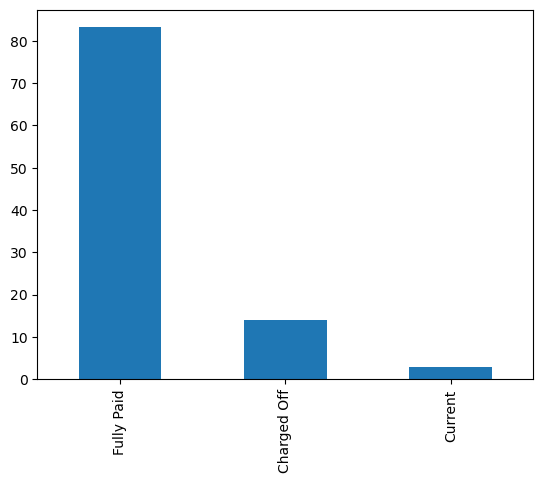

In [21]:
# target column is loan_status we will start analysis
print(round(data.loan_status.value_counts()*100/len(data),2))
round(data.loan_status.value_counts()*100/len(data),2).plot.bar()
plt.show()
#Observation :
# 83.19% loan is Fully Paid
# 13.97% loan is Charges Off(Defaulted)
# 2.84% loan is Current(In Progress loan)

In [22]:
#Since we are analysing on Fully Paid and Charged Off data we will drop data which are loan_status = Current 
data = data[data['loan_status'].isin(['Fully Paid','Charged Off'])]
data.shape

(37544, 47)

## Data Analysis

To start with, the objective of the analysis is to clearly identify the variables that we want to consider for analysis. 

The objective is to identify predictors of default so that at the time of loan application, we can use those variables for approval/rejection of the loan. Now, there are broadly three types of variables - 

1. Those which are related to the applicant (demographic variables such as age, occupation, employment details etc.), 
2. Loan characteristics (amount of loan, interest rate, purpose of loan etc.) and 
3. Customer behaviour variables (those which are generated after the loan is approved such as delinquent 2 years, revolving balance, next payment date etc.).

The customer behaviour variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval. 

Thus, we will use only the other two types of variables.



In [23]:
behaviour_var =  [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "revol_bal",
  "revol_util",
  "total_acc",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type"]
behaviour_var

['delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'revol_bal',
 'revol_util',
 'total_acc',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'application_type']

In [24]:
# let's now remove the behaviour variables from analysis
data = data.drop(behaviour_var, axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 39716
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   37544 non-null  int64  
 1   funded_amnt                 37544 non-null  int64  
 2   funded_amnt_inv             37544 non-null  float64
 3   term                        37544 non-null  int64  
 4   int_rate                    37544 non-null  float64
 5   installment                 37544 non-null  float64
 6   grade                       37544 non-null  object 
 7   sub_grade                   37544 non-null  object 
 8   emp_length                  37544 non-null  int64  
 9   home_ownership              37544 non-null  object 
 10  annual_inc                  37544 non-null  float64
 11  verification_status         37544 non-null  object 
 12  issue_d                     37544 non-null  object 
 13  loan_status                 375

In [25]:
data.shape

(37544, 32)

In [26]:
# also, we will not be able to use the variables zip code, address, state etc.
# thus lets get rid of all these variables as well

data = data.drop(['url', 'zip_code', 'addr_state'], axis=1)

In [27]:
## filtering only fully paid or charged-off
#data = data[data['loan_status'] != 'Current']
#data['loan_status'] = data['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

## converting loan_status to integer type
#data['loan_status'] = data['loan_status'].apply(lambda x: pd.to_numeric(x))

## summarising the values
#data['loan_status'].value_counts()

In [28]:
data = data.drop(['collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens','policy_code', 'out_prncp', 'out_prncp_inv', 'recoveries', 'collection_recovery_fee'],axis=1)

In [29]:
data.shape

(37544, 21)

In [30]:
#Subset data for loan_status = Charged Off
data_master = data

data_c = data[data['loan_status'].isin(['Charged Off'])]
data_c.shape

data = data[data['loan_status'].isin(['Fully Paid'])]
data.shape

(32145, 21)

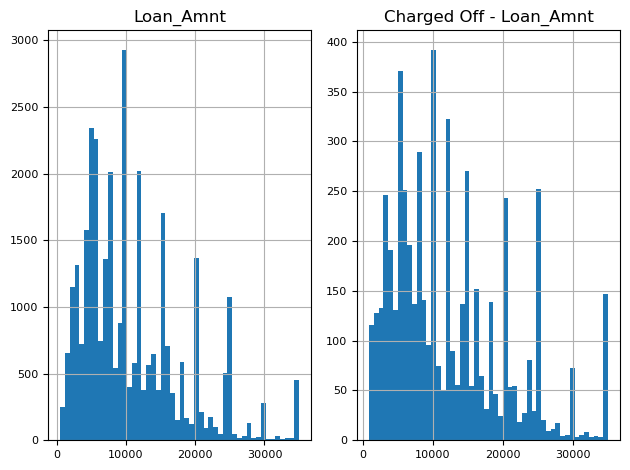

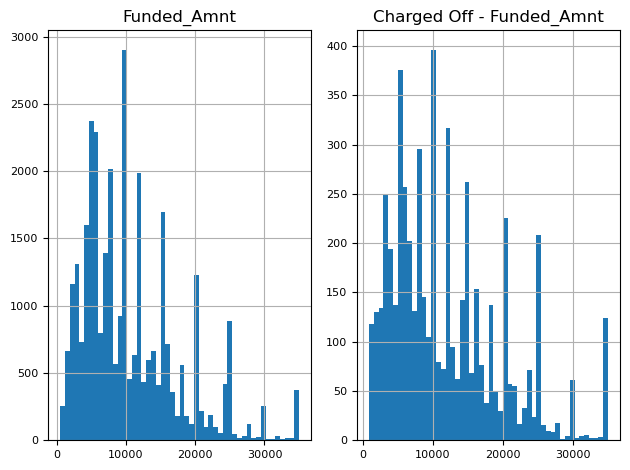

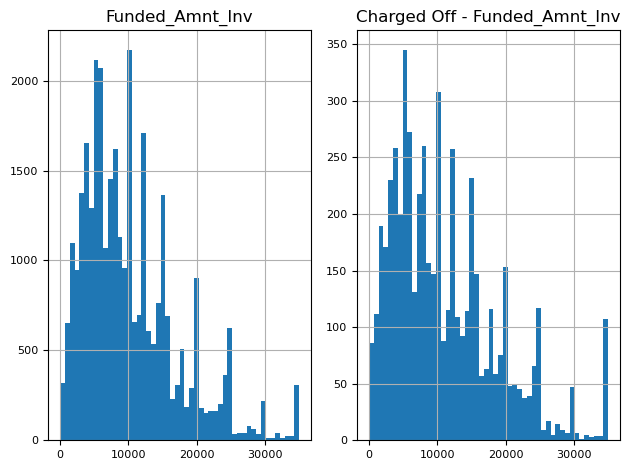

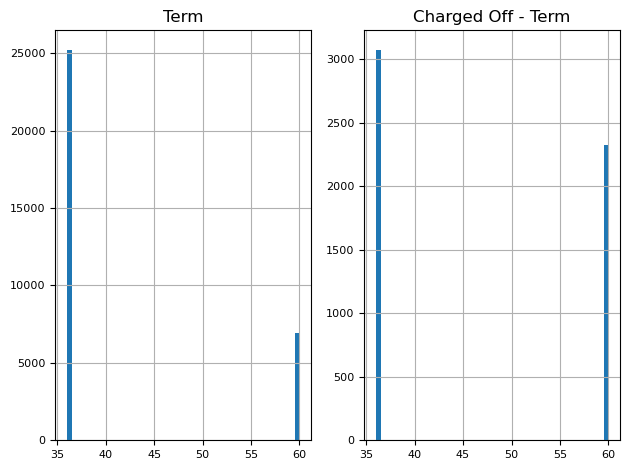

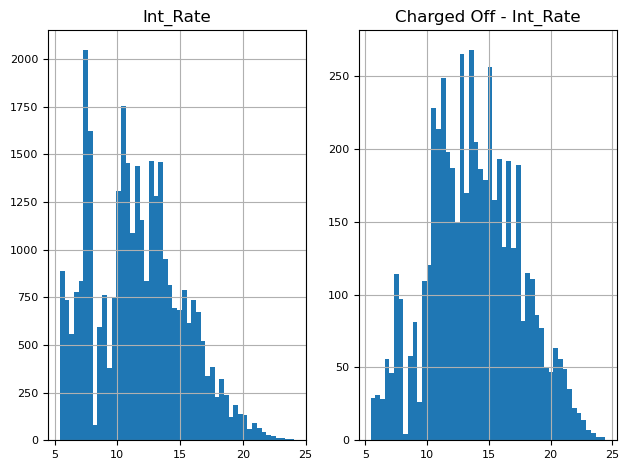

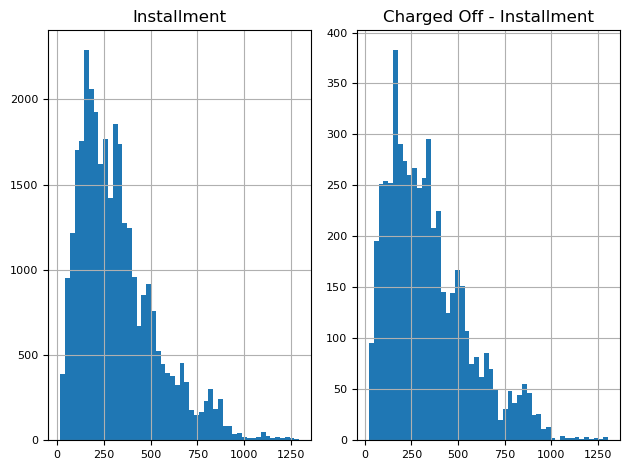

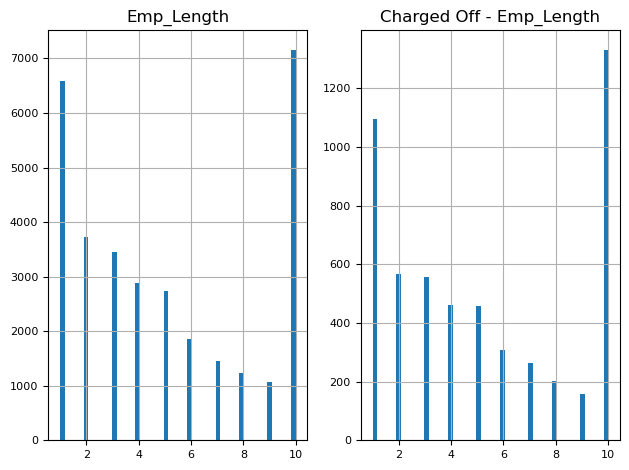

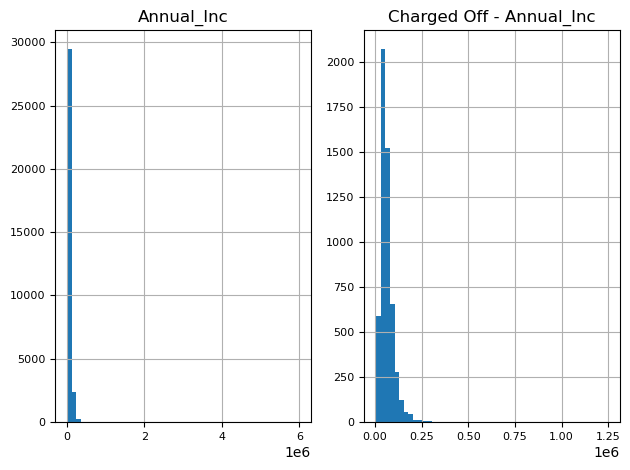

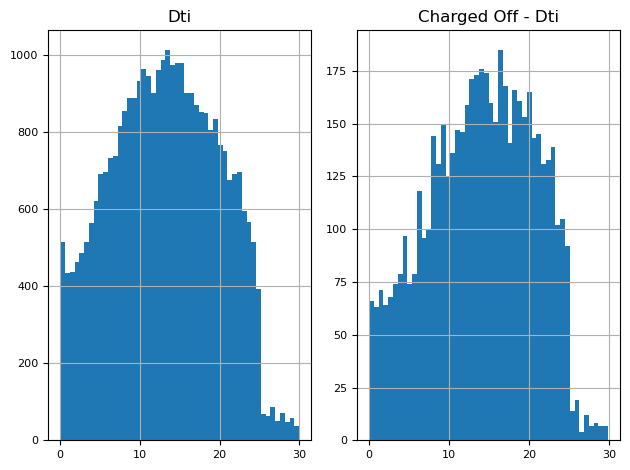

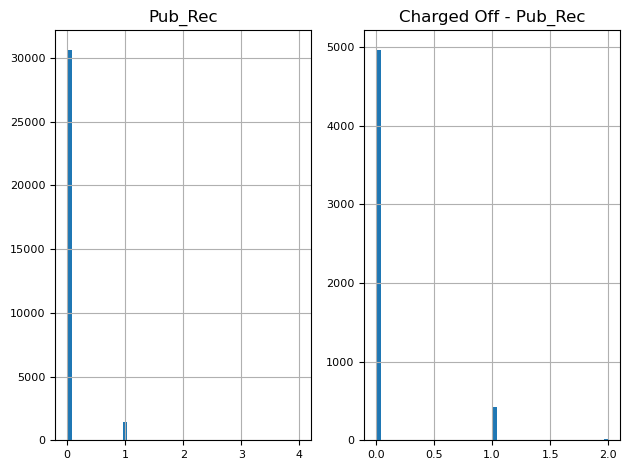

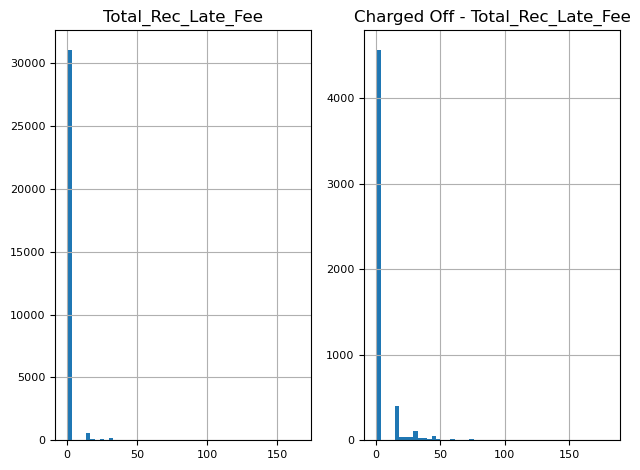

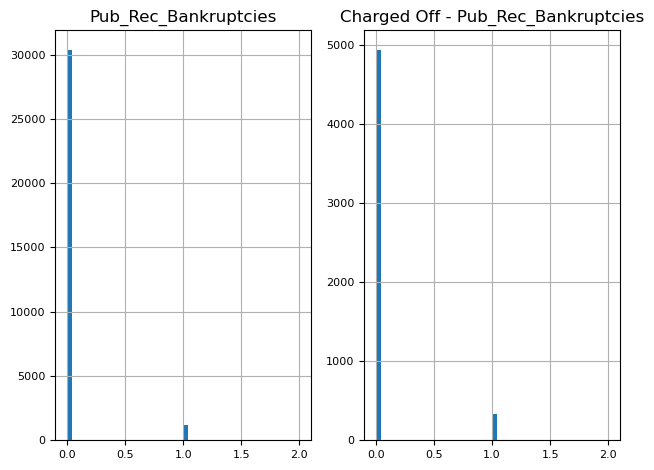

In [31]:
#Checking hist diagran of all number columns
nrow = indx = 1

def plotHistChart(i):
    plt.subplot(1,2,1)
    ax = data[i].hist(bins=50, xlabelsize=8, ylabelsize=8)
    ax.set_title(i.title())
    plt.subplot(1,2,2)
    ax1 = data_c[i].hist(bins=50, xlabelsize=8, ylabelsize=8)
    ax1.set_title('Charged Off - ' + i.title())
    plt.tight_layout()
    plt.show()
    
for i in data.select_dtypes(include=['number']):
    plotHistChart(i)
    


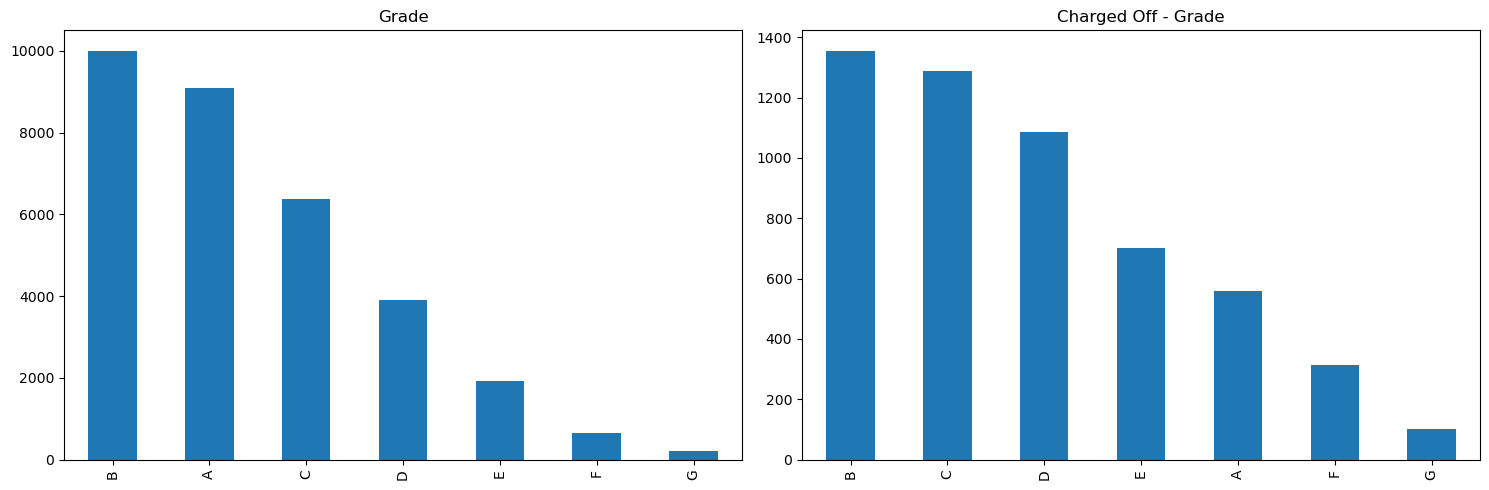

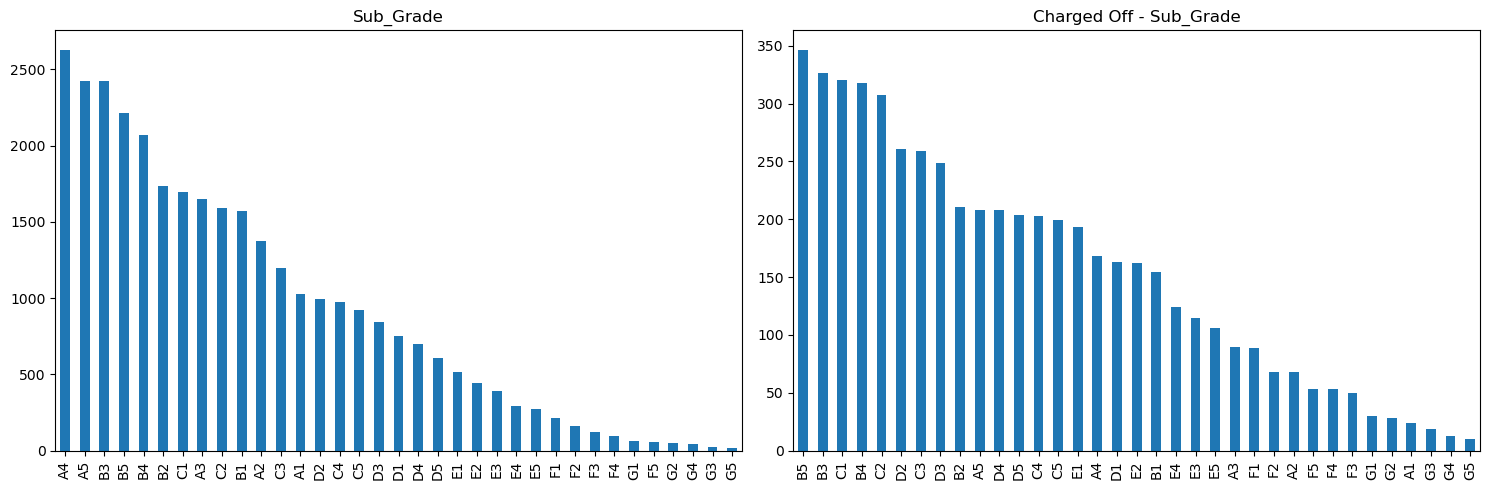

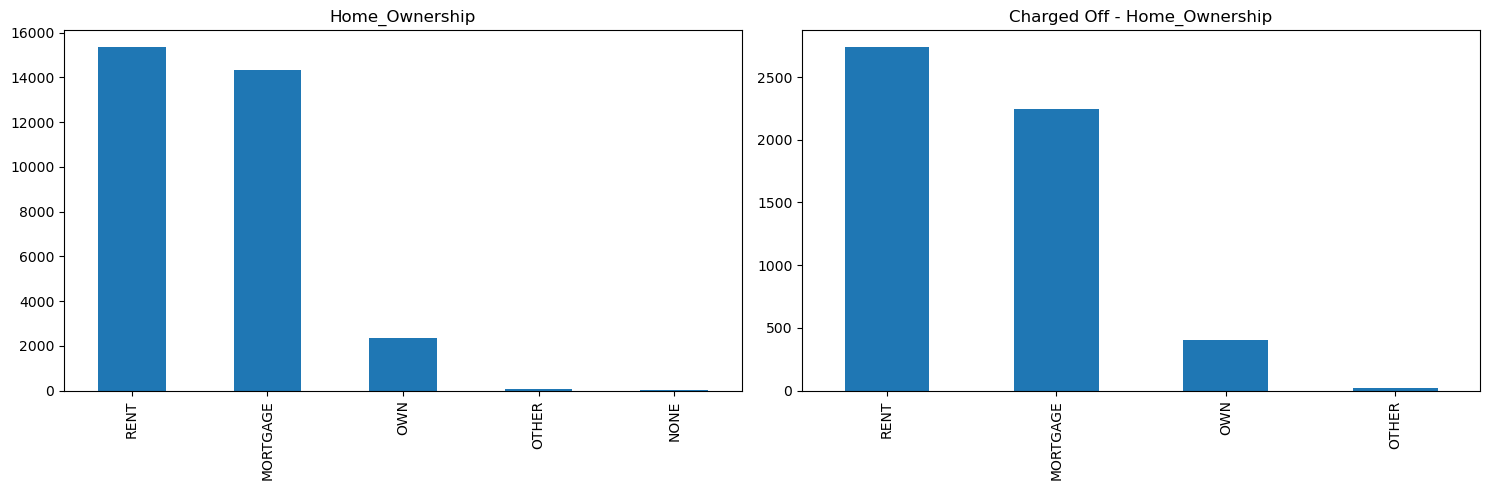

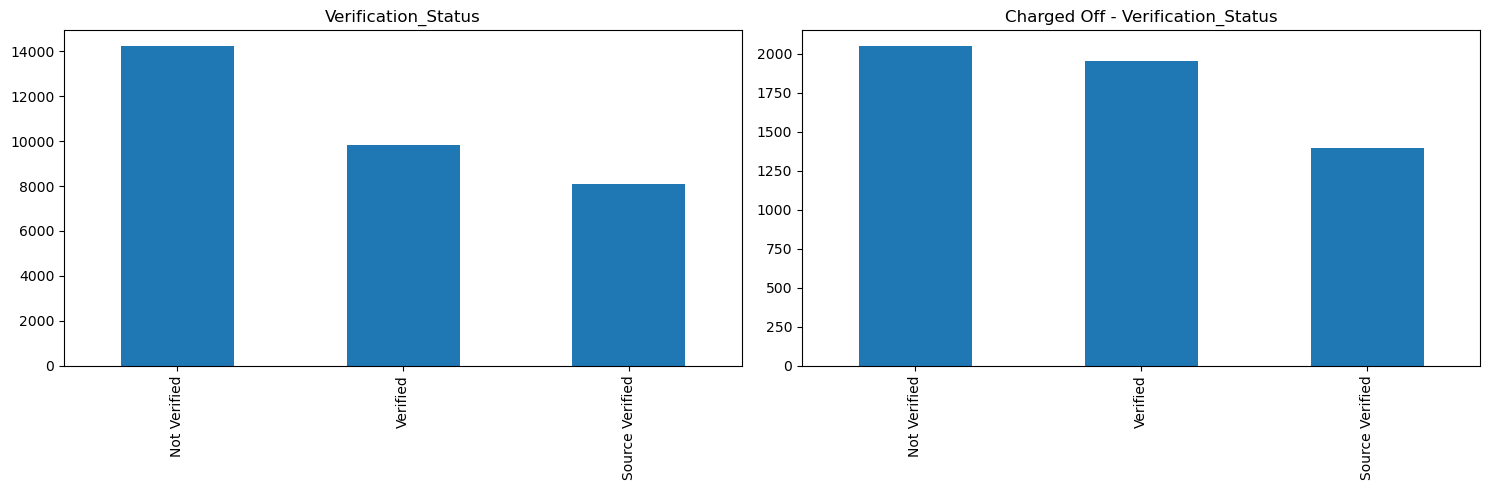

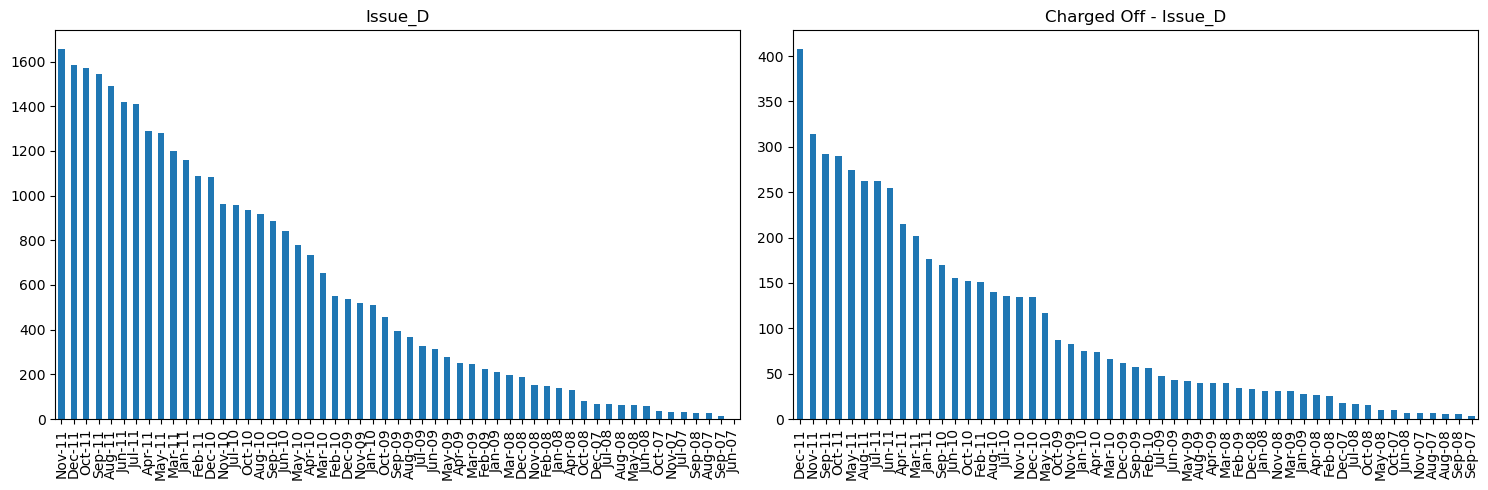

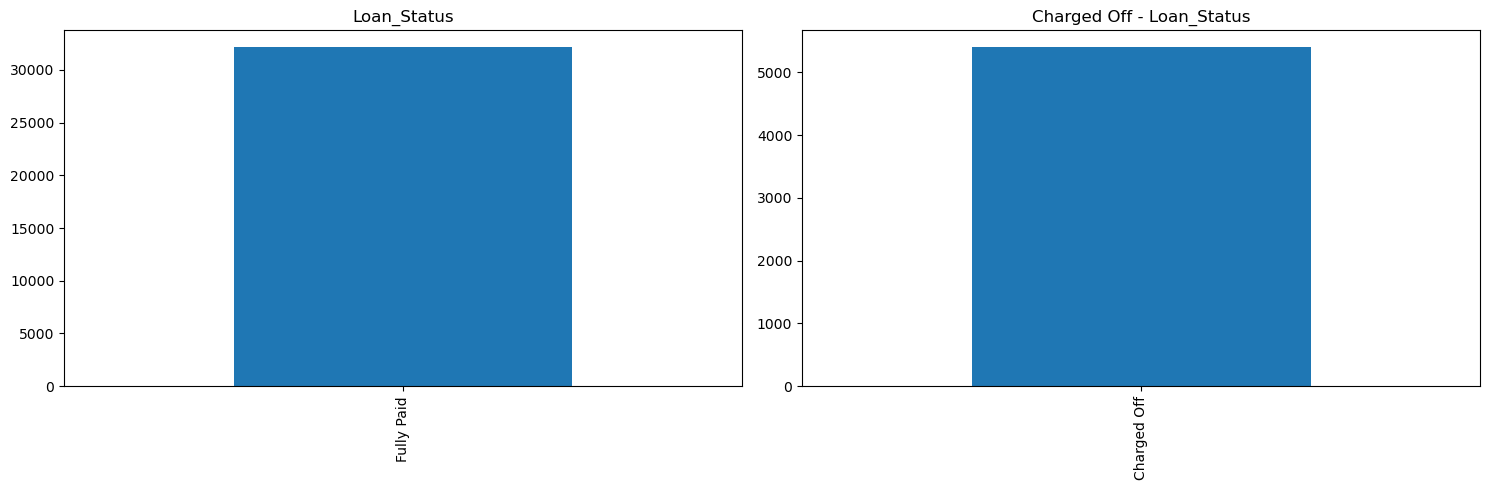

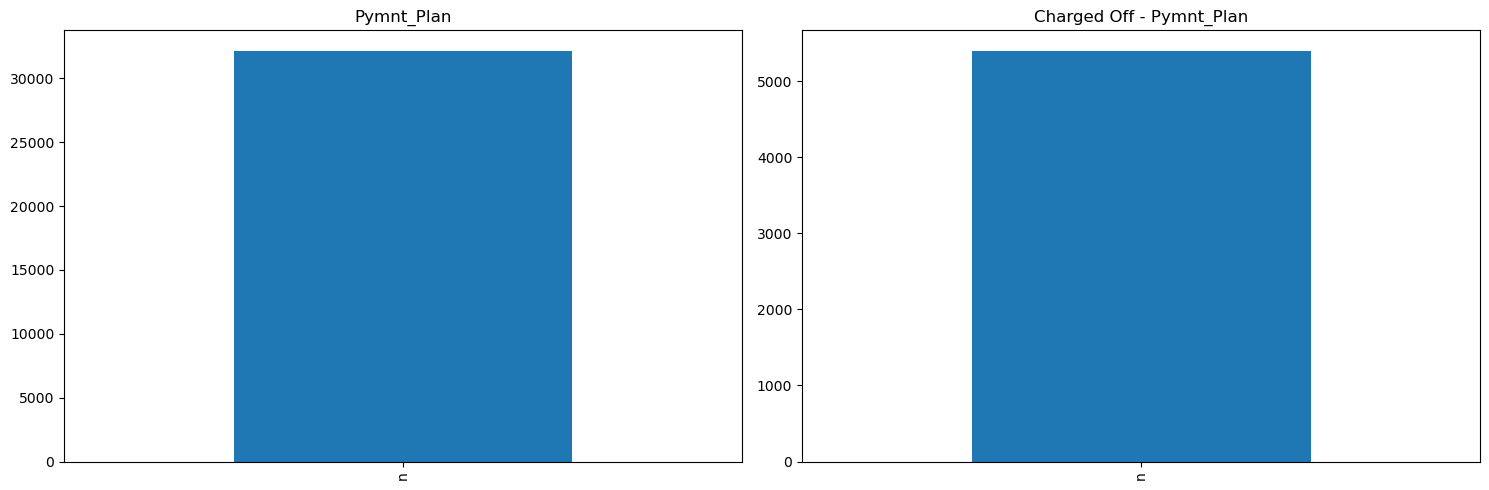

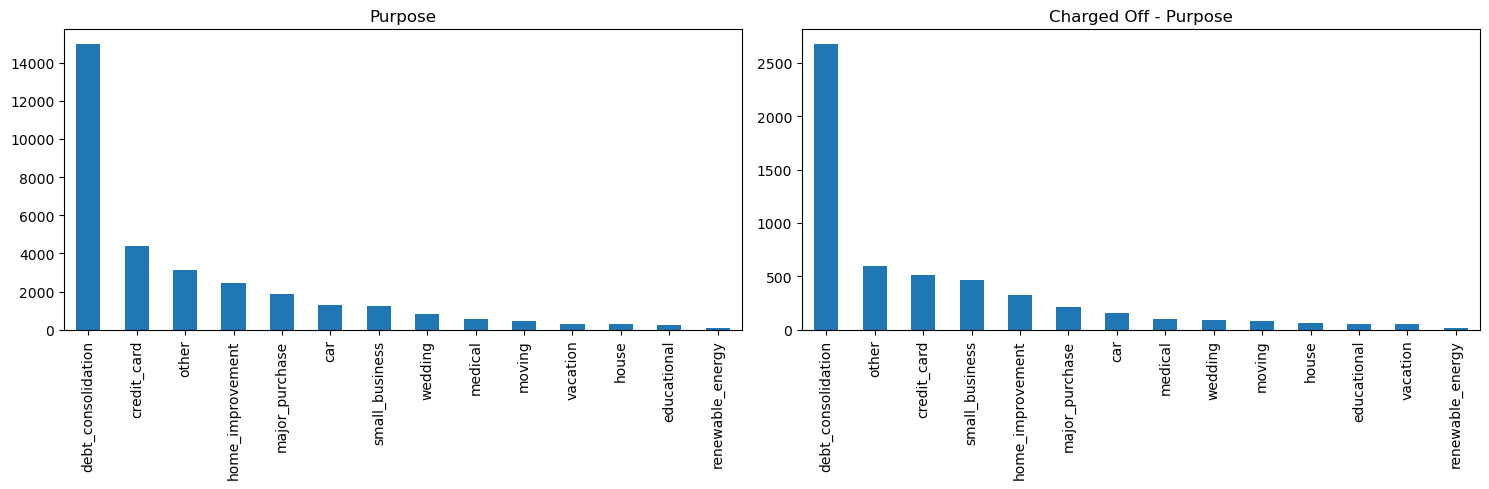

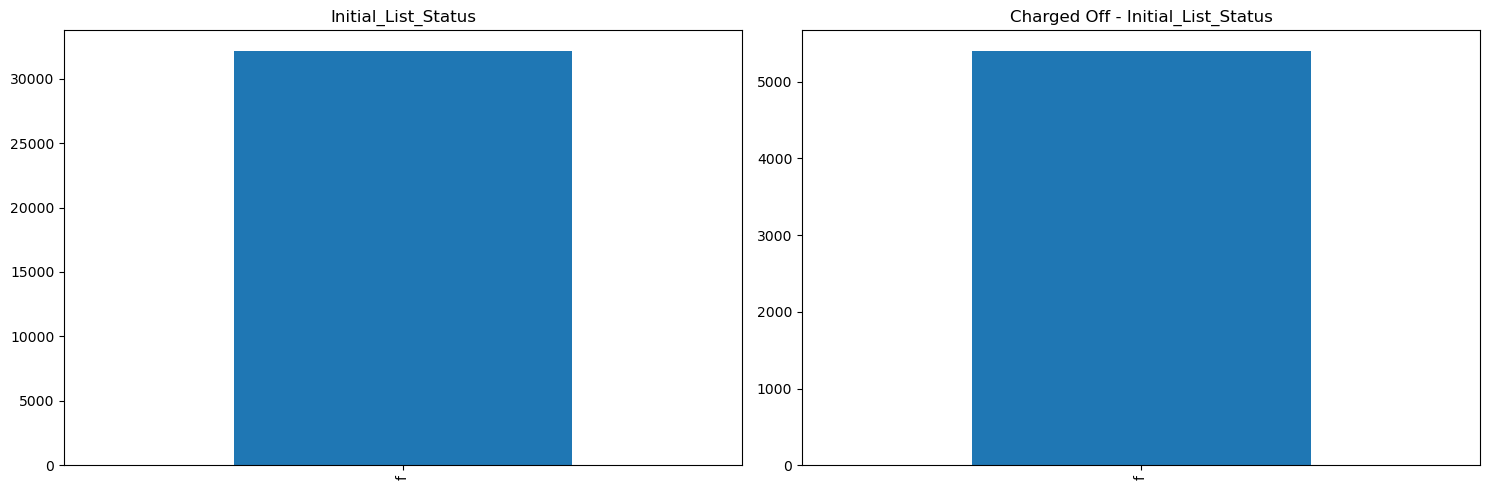

In [32]:
#Checking all Object columns bar graphs
nrow = indx = 1

def plotBarChart(i):
    plt.figure(figsize=(15, 5))
    plt.subplot(1,2,1)
    ax = data[i].value_counts().plot.bar()
    ax.set_title(i.title())
    plt.subplot(1,2,2)
    ax1 = data_c[i].value_counts().plot.bar()
    ax1.set_title('Charged Off - ' + i.title())
    plt.tight_layout()
    plt.show()

for i in data.select_dtypes(include=['object']):
    plotBarChart(i)
    
#Observations:
# Grade : Loans are approved for Grade A,B,C are more.
# Sub_Grade : We see the same trend for Sub Grade wher A,B,C are approved more
# Loan_Status : Major approved loans are fully paid
# Verification_status : Major loans are nor verified
# Home_ownership : Major borrowers has RENT and Mortgage ownership
# Purpose : Overall, debt_consolidation 46.93%, credit_card 12.92% and other 10.05 are major category for taking loan

<Axes: >

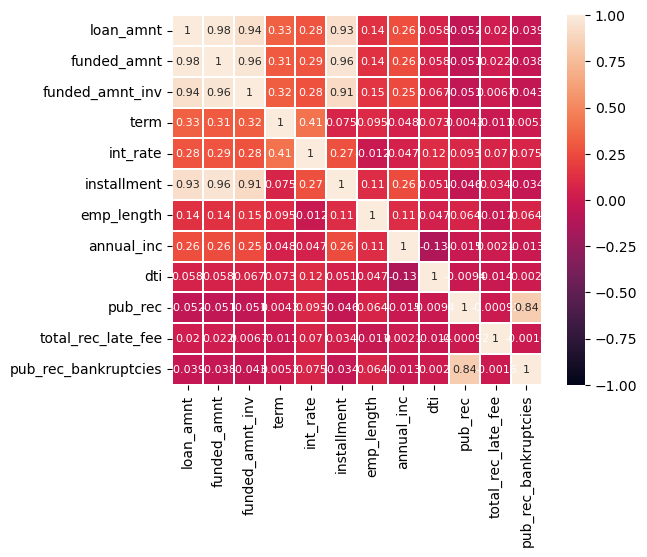

In [33]:
sns.heatmap(data.corr(), 
            vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)

<Axes: >

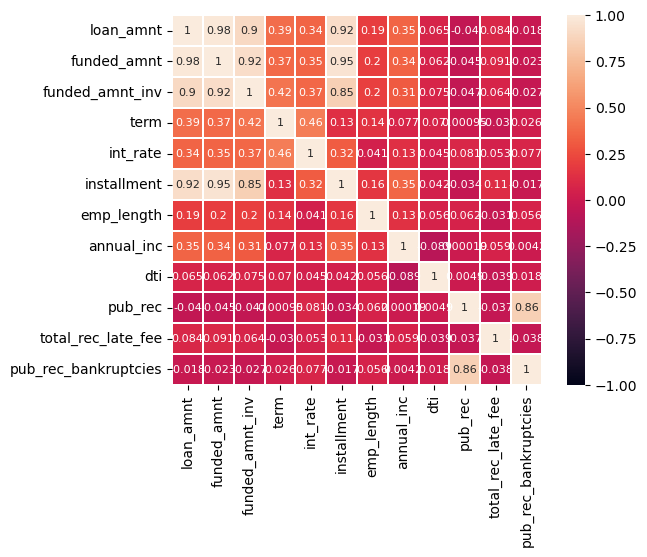

In [34]:
sns.heatmap(data_c.corr(), 
            vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)

<Axes: >

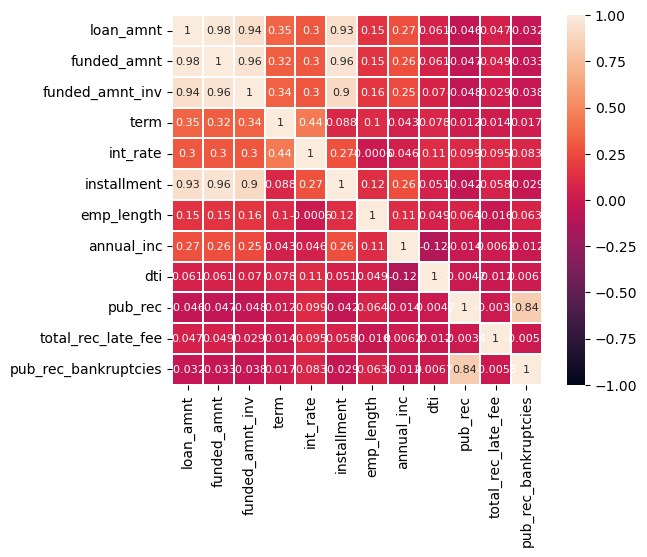

In [35]:
sns.heatmap(data_master.corr(), 
            vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)

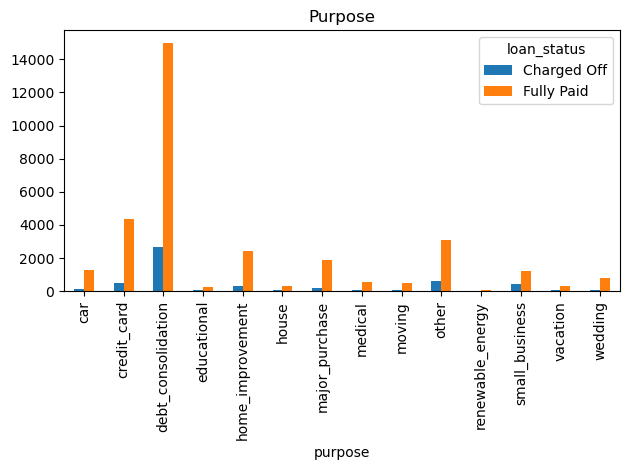

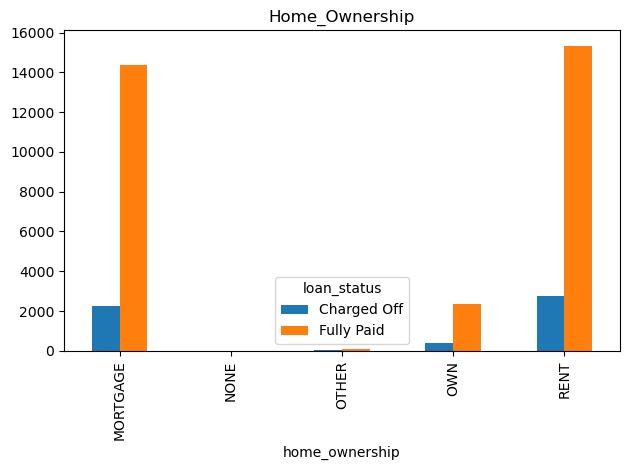

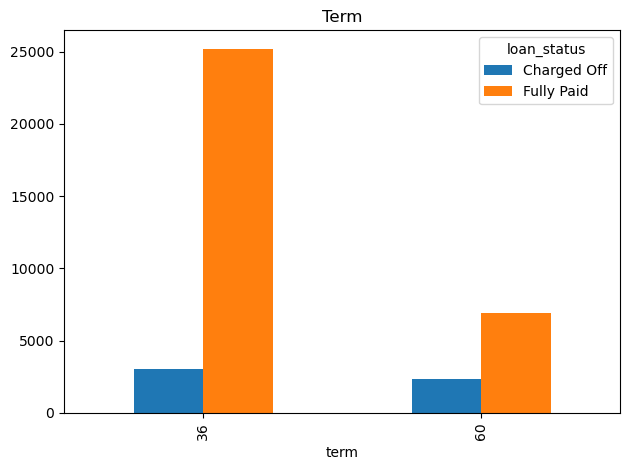

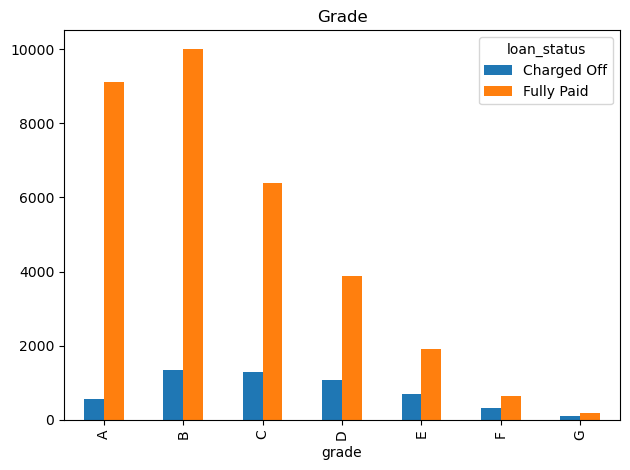

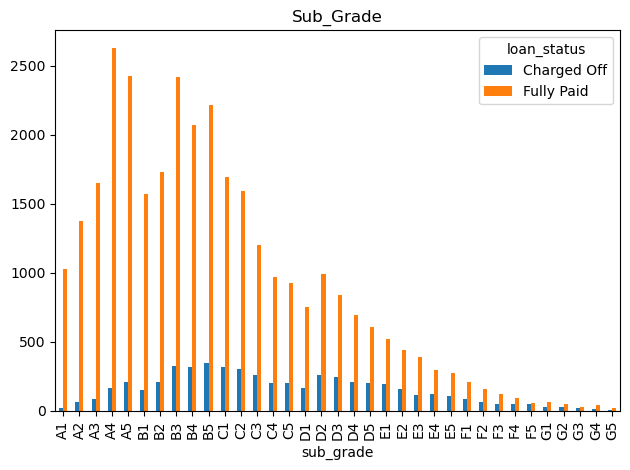

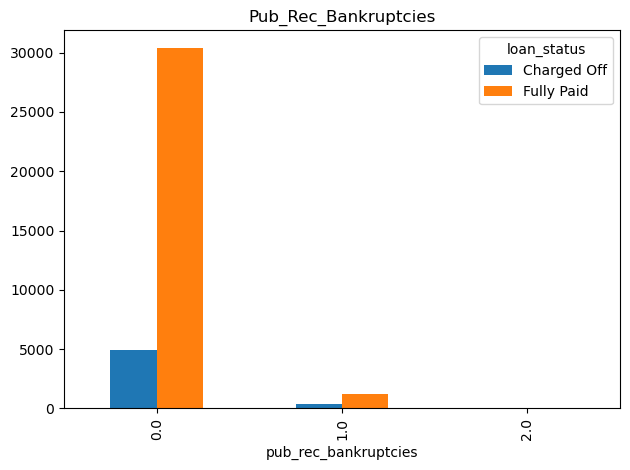

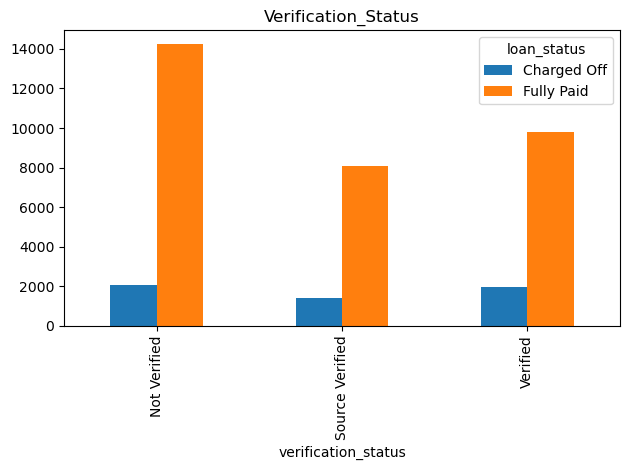

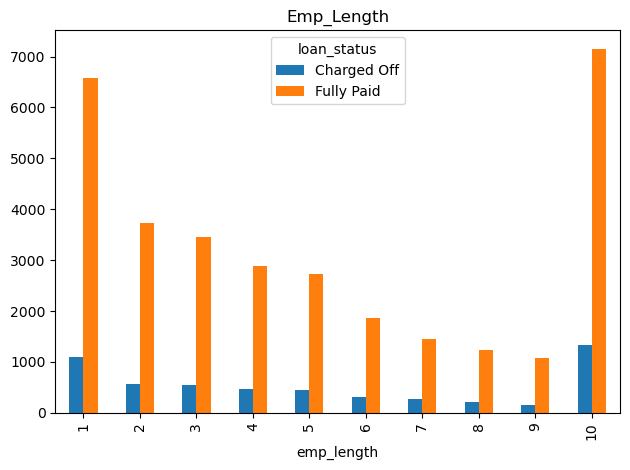

In [36]:
#target column loan_status
def plotBarChart(idx):
        ax = data_master.groupby([idx,'loan_status']).loan_status.count()
        #print(ax)
        ax.unstack(fill_value=0).plot.bar()
        plt.title(idx.title())
        plt.tight_layout()
        plt.show()
    
for idx in ['purpose', 'home_ownership', 'term', 'grade', 'sub_grade', 'pub_rec_bankruptcies', 'verification_status','emp_length']:
    plotBarChart(idx)

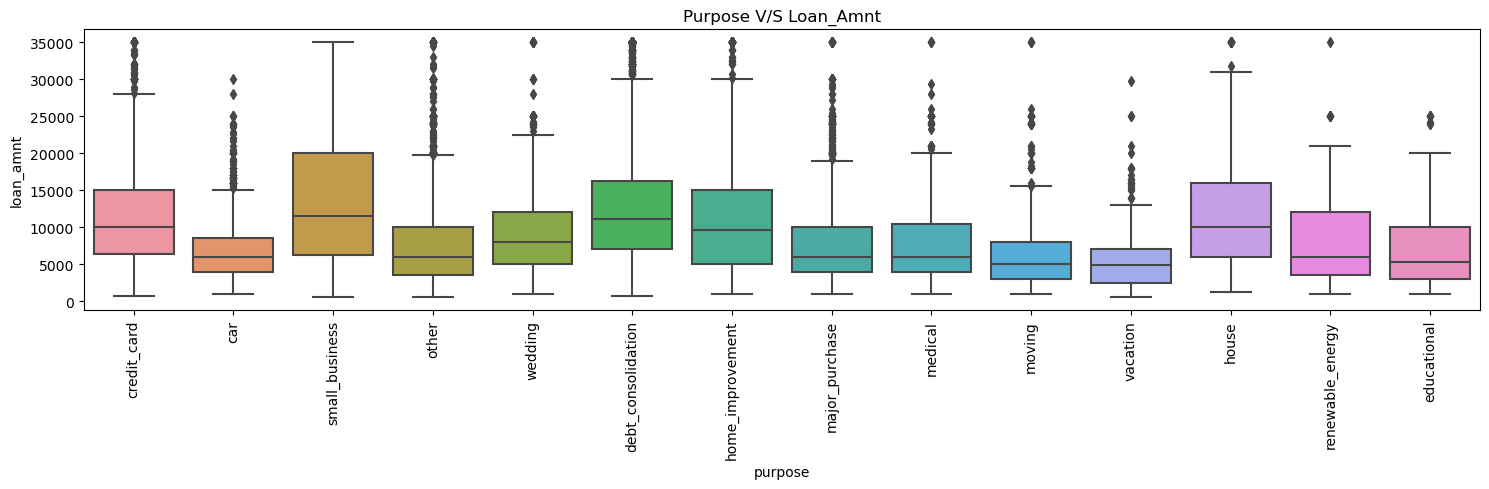

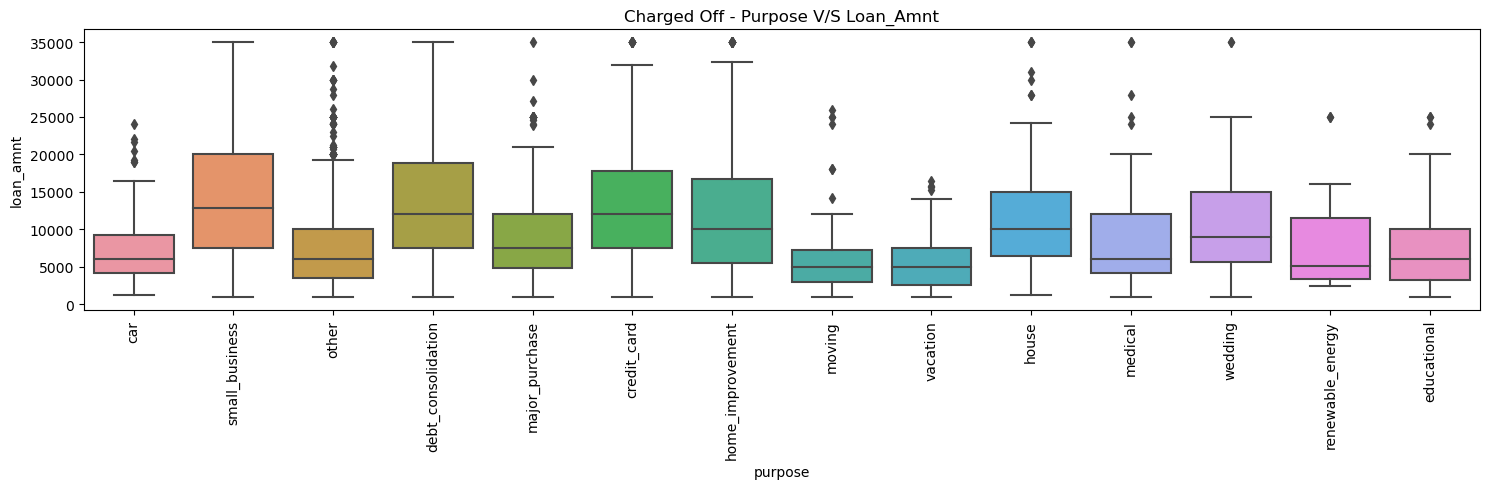

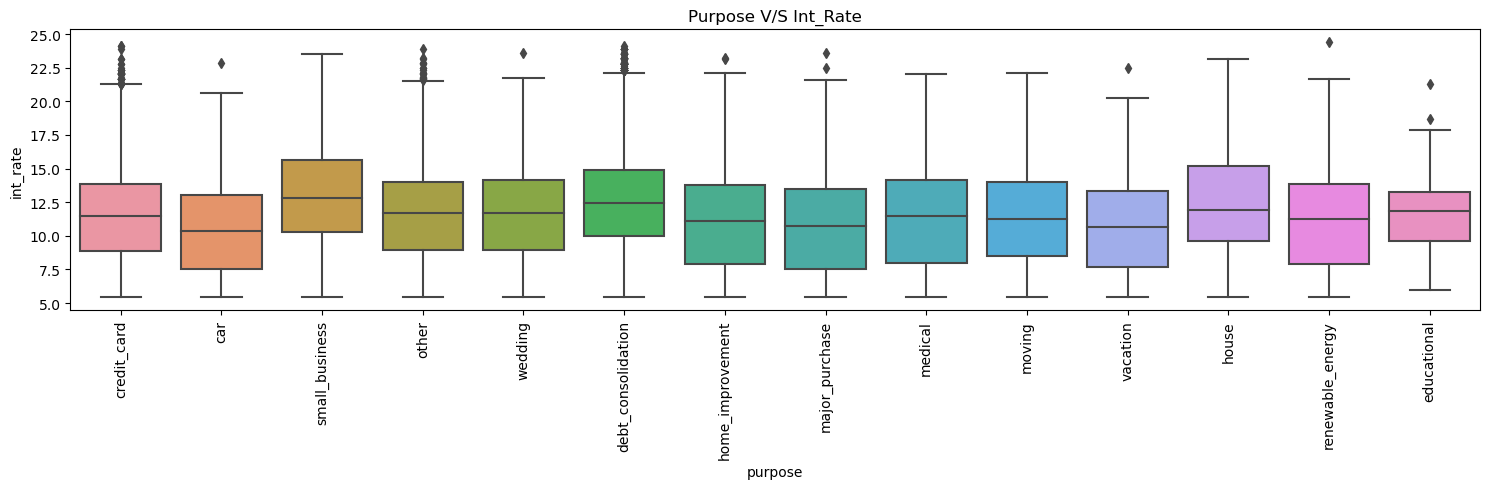

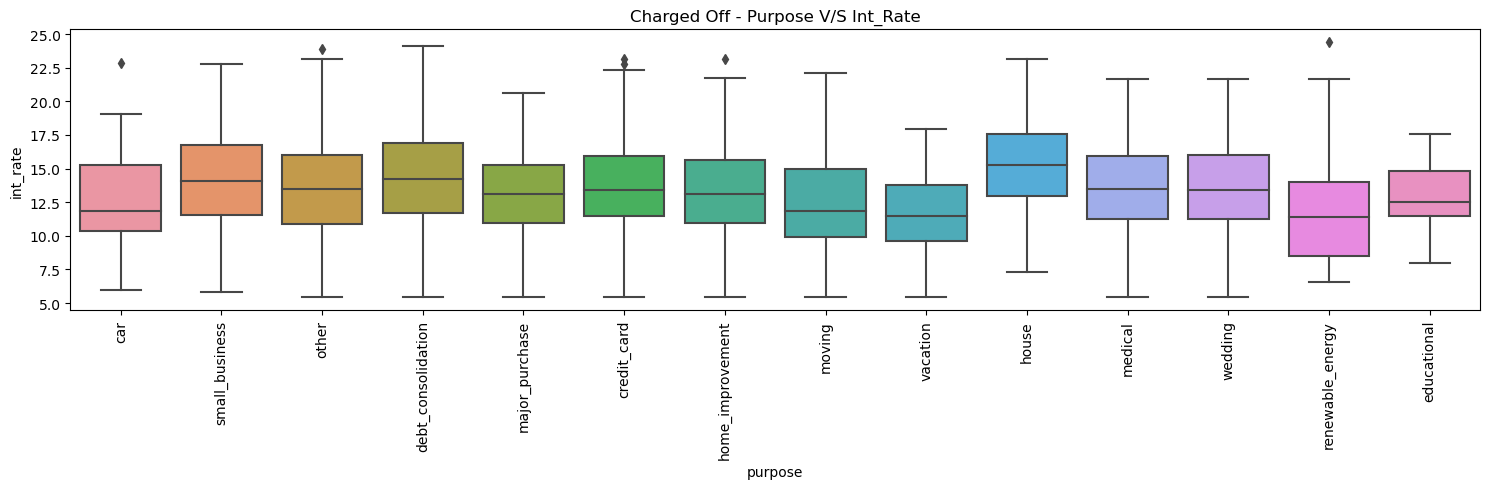

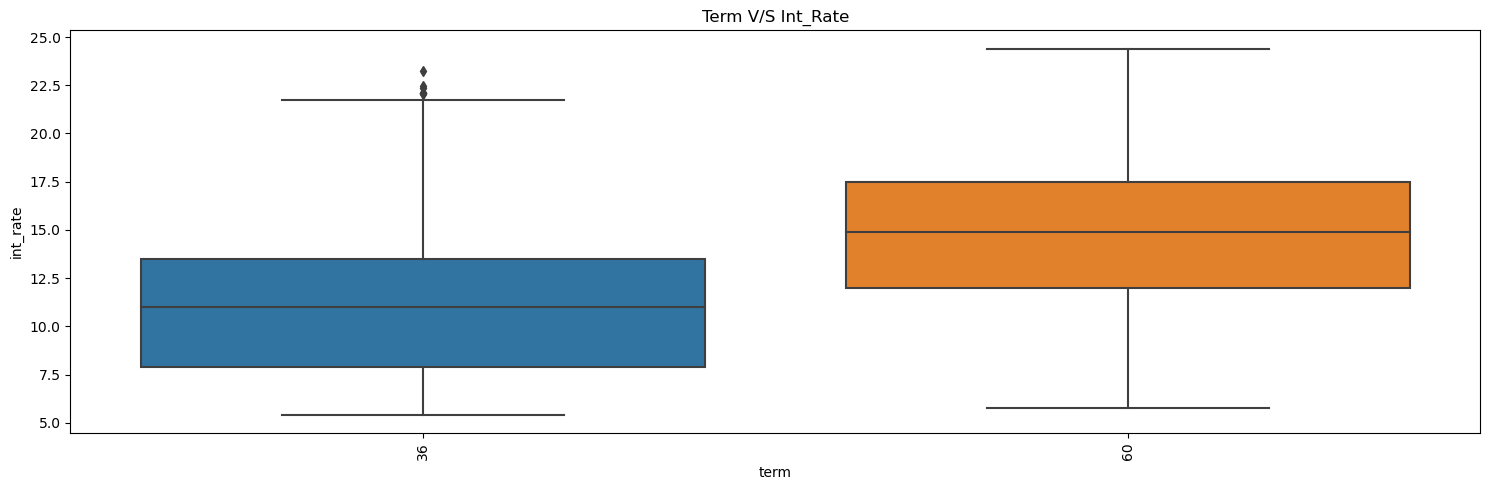

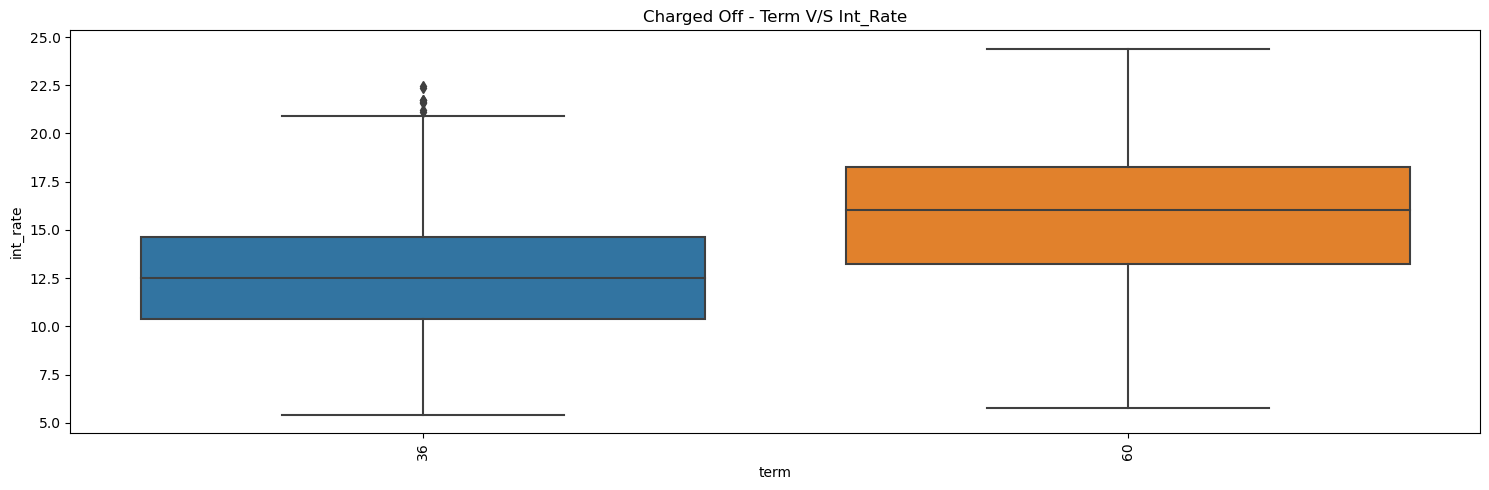

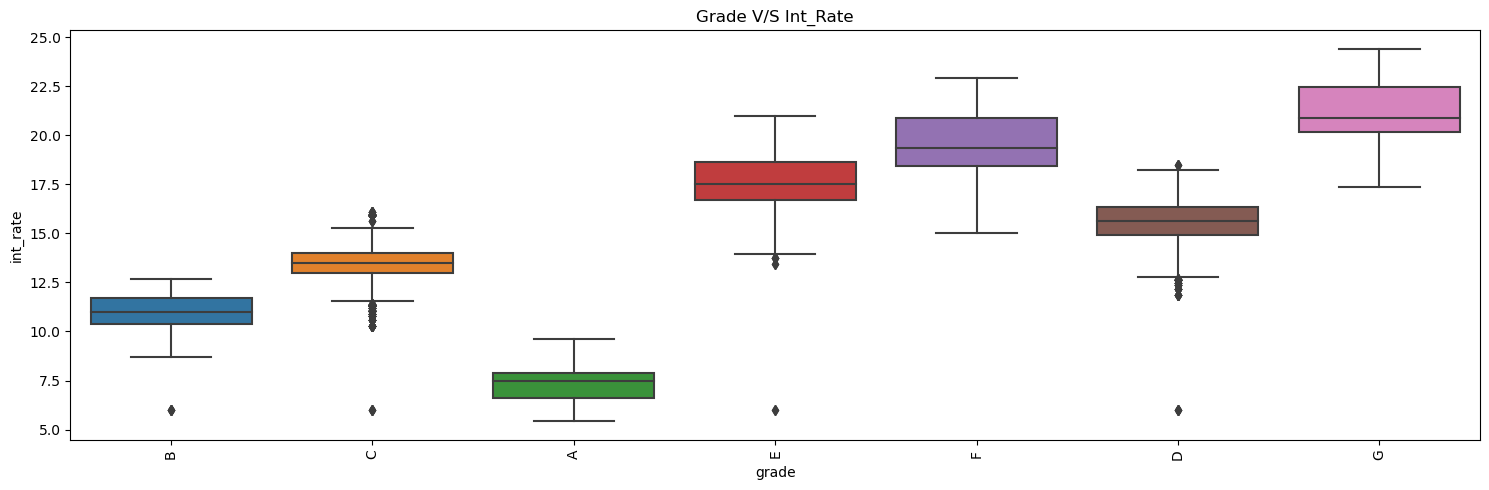

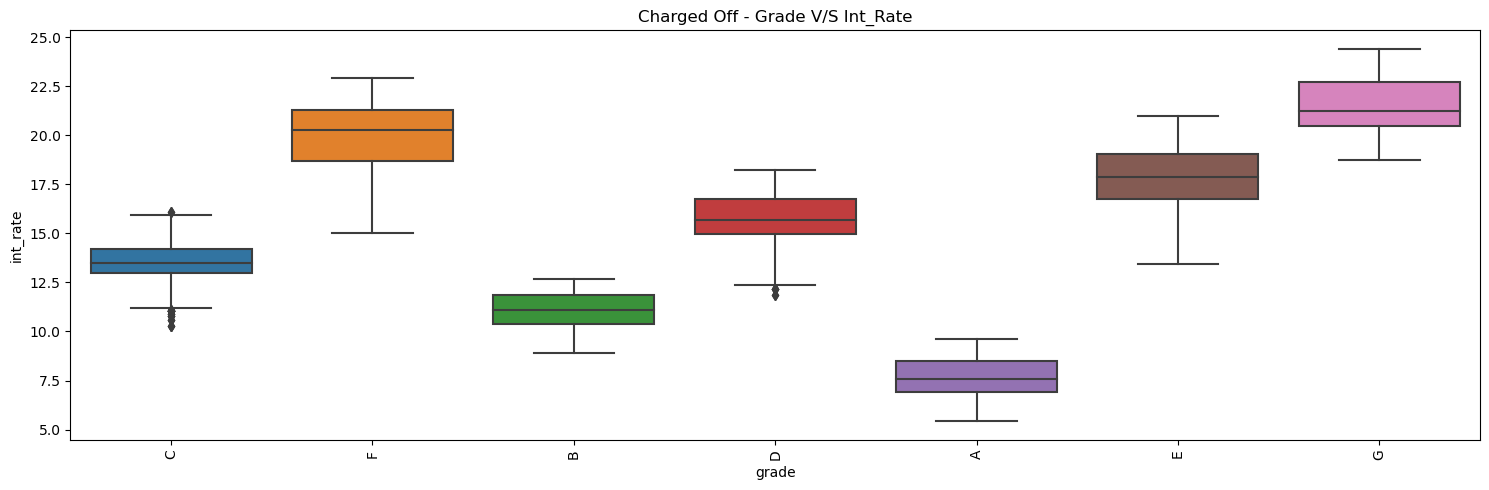

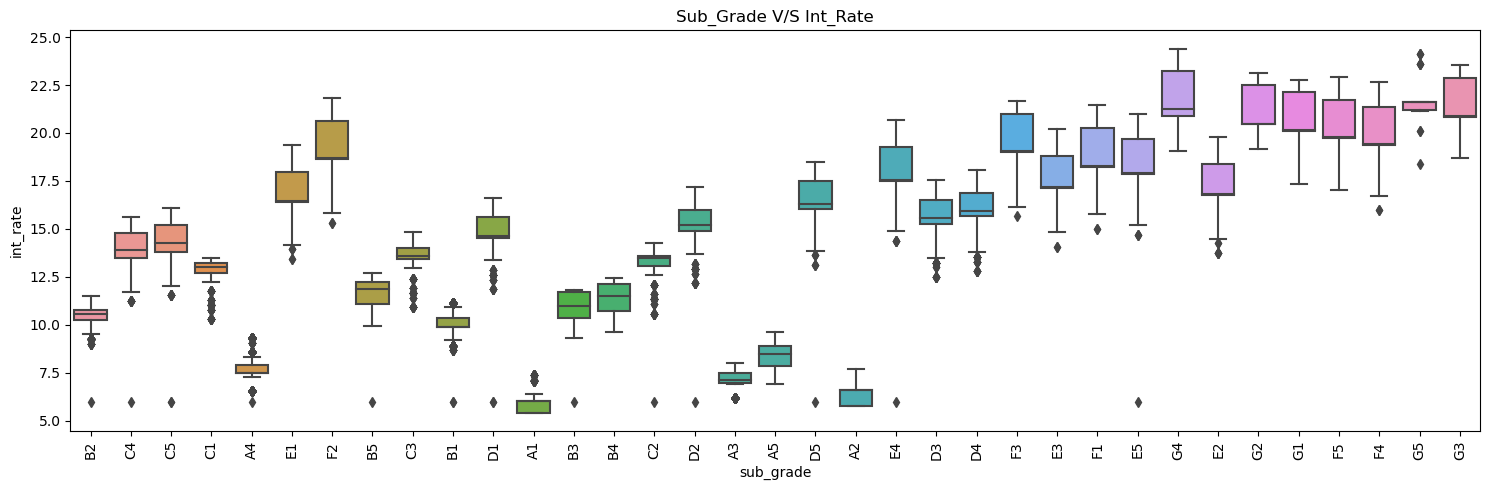

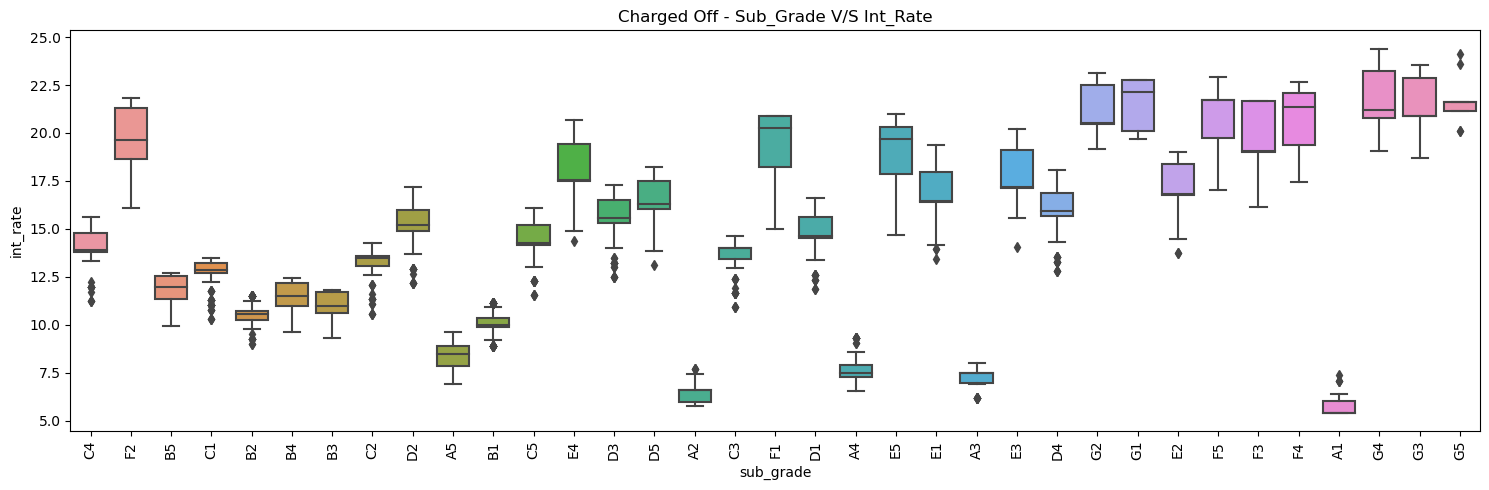

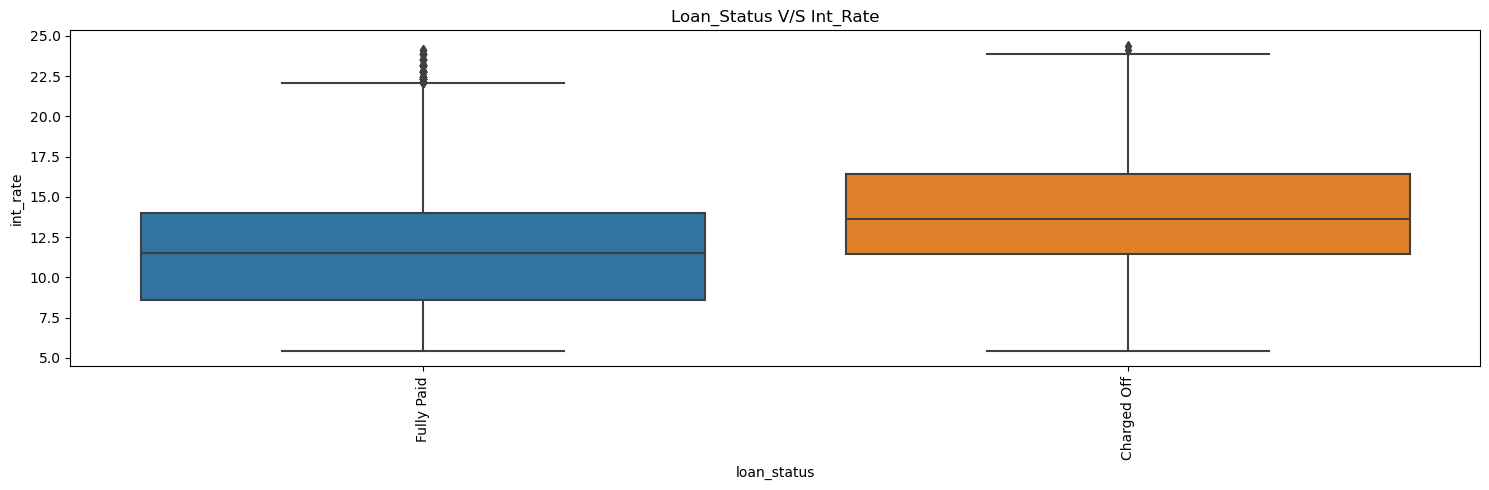

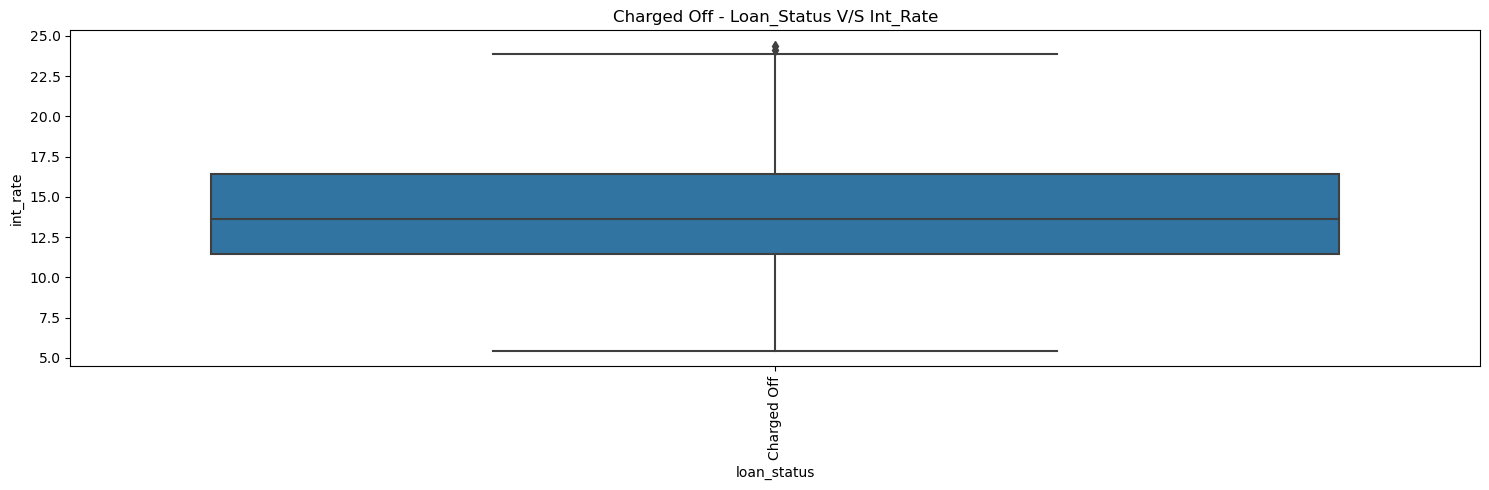

In [37]:
#Bivariate Analysis

def plotBoxChart(xAxis,yAxis):
    plt.figure(figsize=(15, 5))
    ax = sns.boxplot(y=yAxis, x=xAxis, data =data_master)
    ax.set_title(xAxis.title() + ' V/S ' + yAxis.title())
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)    
    plt.tight_layout()
    plt.show()
    plt.figure(figsize=(15, 5))
    ax1 = sns.boxplot(y=yAxis, x=xAxis, data =data_c)
    ax1.set_title('Charged Off - ' + xAxis.title() + ' V/S ' + yAxis.title())
    ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)    
    plt.tight_layout()
    plt.show()
    
#Checking Purpose with other variables
plotBoxChart('purpose','loan_amnt') 

plotBoxChart('purpose','int_rate') 

plotBoxChart('term','int_rate') 

plotBoxChart('grade','int_rate') 

plotBoxChart('sub_grade','int_rate') 

plotBoxChart('loan_status','int_rate') 
